In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.import data

In [14]:
data_set=pd.read_csv('C:\\Users\\User\\100-Days-Of-ML-Code-master\\datasets\\Social_Network_Ads.csv')
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# 2.data preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
data_set2=data_set.iloc[:,1:-1]

In [17]:
#樹對DATA有沒有標準化好像影響不大?
data_set2['Gender']=LabelEncoder().fit_transform(np.array(data_set2['Gender']).reshape(-1,1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
data_set2[['Age','EstimatedSalary']]=StandardScaler().fit_transform(data_set2.iloc[:,1:])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
data_set2.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [20]:
data_set2=pd.concat([data_set2,data_set['Purchased']],axis=1)

In [21]:
data_set2.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


In [22]:
X=data_set2.iloc[:,:-1]
Y=data_set2.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# 3.train model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model_jmda=RandomForestClassifier(n_estimators=20,max_depth=2,random_state=1,criterion='entropy')

In [25]:
model_jmda.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [26]:
model_jmda.score(x_train,y_train),model_jmda.score(x_test,y_test)

(0.9035714285714286, 0.925)

Text(0.5, 1.0, 'importance of parameters')

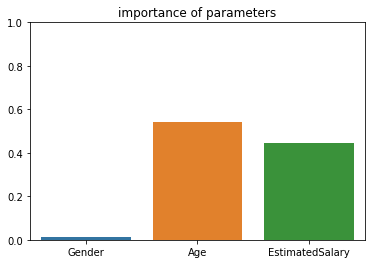

In [27]:
importance=pd.DataFrame(data=np.array(model_jmda.feature_importances_).reshape(1,3),columns=data_set2.columns[0:3])
sns.barplot(data=importance)
plt.ylim(0,1)
plt.title('importance of parameters')

# 4.adjust parameter

In [28]:
score_table=[]
for i in range(1,50):
    for j in range(1,5):
        test_model=RandomForestClassifier(n_estimators=i,max_depth=j,random_state=1,criterion='entropy')
        test_model.fit(x_train,y_train)
        score=test_model.score(x_test,y_test)
        list1=[i,j,score]
        score_table.append(list1)

In [29]:
total_score=pd.DataFrame(data=score_table,columns=['n_estimators','max_depth','score'])
total_score.head()

,n_estimators,max_depth,score
0,1,1,0.841667
1,1,2,0.841667
2,1,3,0.891667
3,1,4,0.883333
4,2,1,0.841667


In [30]:
total_score[total_score['score']==total_score['score'].max()]

,n_estimators,max_depth,score
34,9,3,0.925
35,9,4,0.925
45,12,2,0.925
54,14,3,0.925
58,15,3,0.925
62,16,3,0.925
65,17,2,0.925
77,20,2,0.925


In [31]:
total_score_table=pd.pivot_table(total_score,values='score',index='max_depth',columns='n_estimators')

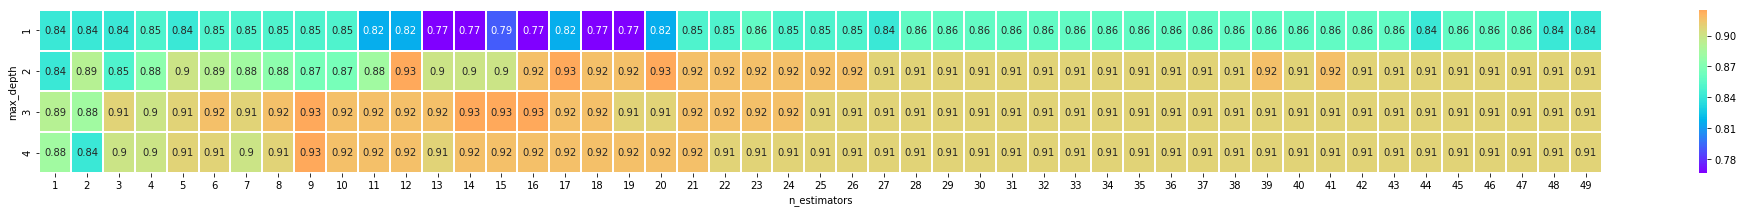

In [32]:
plt.figure(figsize=(35,3))
sns.heatmap(total_score_table,cmap='rainbow',center=0.87,annot=True,linewidths=1)

# 5.draw tree

export_graphviz只支援單一tree不支援forest，只能從forest中挑一顆tree畫

In [26]:
from sklearn import tree

In [27]:
tree.export_graphviz(model_jmda.estimators_[0],)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[1] <= 0.749\\nentropy = 0.971\\nsamples = 182\\nvalue = [168, 112]"] ;\n1 [label="X[0] <= 0.5\\nentropy = 0.703\\nsamples = 129\\nvalue = [157, 37]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.748\\nsamples = 57\\nvalue = [70, 19]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.661\\nsamples = 72\\nvalue = [87, 18]"] ;\n1 -> 3 ;\n4 [label="X[2] <= -0.829\\nentropy = 0.552\\nsamples = 53\\nvalue = [11, 75]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="entropy = 0.0\\nsamples = 15\\nvalue = [0, 25]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.681\\nsamples = 38\\nvalue = [11, 50]"] ;\n4 -> 6 ;\n}'

# 6.Visualization

In [50]:
model_jmda_2=RandomForestClassifier(n_estimators=20,max_depth=2,random_state=1,criterion='entropy')
model_jmda_2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [54]:
x1=np.linspace(data_set2['Age'].min(),data_set2['Age'].max(),500)
x2=np.linspace(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max(),500)
X1,X2=np.meshgrid(x1,x2)
x_grid=np.concatenate([X1.reshape(-1,1),X2.reshape(-1,1)],axis=1)
y_grid=model_jmda_2.predict(x_grid).reshape(-1,1)
grid=np.concatenate([x_grid,y_grid],axis=1)
gridmap=pd.DataFrame(data=grid,columns=['Age','EstimatedSalary','Purchased'])
gridmap.head()

,Age,EstimatedSalary,Purchased
0,-1.877311,-1.607506,0.0
1,-1.869271,-1.607506,0.0
2,-1.861232,-1.607506,0.0
3,-1.853193,-1.607506,0.0
4,-1.845154,-1.607506,0.0


Text(0.5, 1.0, 'linear fitting')

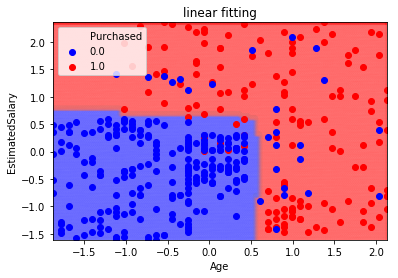

In [58]:
sns.scatterplot(data=gridmap,x='Age',y='EstimatedSalary',hue='Purchased',palette=['blue','red'],alpha=0.05)
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==1],y=data_set2['EstimatedSalary'][data_set2['Purchased']==1],color='red')
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==0],y=data_set2['EstimatedSalary'][data_set2['Purchased']==0],color='blue')
plt.xlim(data_set2['Age'].min(),data_set2['Age'].max())
plt.ylim(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max())
plt.title('linear fitting')